In [1]:
import pandas as pd

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_grad_pres.csv')

In [39]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_tratado_st.csv')

In [40]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', header=0, sep = ",")

In [ ]:
# Cria o DataFrame completo, com todos os dados do arquivo dataset_grad_pres.csv

df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [6]:
########################### TABELA ##################
# Grupo / Baixa renda / Escola Pública /  Etnia-PPI / PCD
# Grupo A sim sim sim não
# Grupo A1 sim sim sim sim
# Grupo B sim sim não não
# Grupo B1 sim sim não sim
# Grupo C não não não não
# Grupo D não sim sim não
# Grupo D1 não sim  sim sim
# Grupo E não sim não não
# Grupo E1 não sim não sim

In [41]:
# Inclui no final do DataFrame df_completo as colunas:
# Baixa renda; Escola pública; Etnia; PPI; PCD
# e preenche seus valores com "Sim" ou "Não", de acordo com a tabela acima

def classificar_baixa_renda(cota):
    baixa_renda_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1"]

    if cota in baixa_renda_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Baixa renda'] = df_completo['COTA'].apply(classificar_baixa_renda)

def classificar_escola_publica(cota):
    escola_publica_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1", "Grupo D", "Grupo D1", "Grupo E", "Grupo E1"]

    if cota in escola_publica_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Escola pública'] = df_completo['COTA'].apply(classificar_escola_publica)

def classificar_etnia_PPI(cota):
    etnia_ppi_categorias = ["Grupo A", "Grupo A1", "Grupo D", "Grupo D1"]

    if cota in etnia_ppi_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Etnia PPI'] = df_completo['COTA'].apply(classificar_etnia_PPI)

def classificar_PCD(cota):
    pcd_categorias = ["Grupo A1", "Grupo B1", "Grupo D1", "Grupo E1"]

    if cota in pcd_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['PCD'] = df_completo['COTA'].apply(classificar_PCD)

In [ ]:
# Para visualizar os 5 primeiros registros do DataFrame completo, retire o # do início da linha abaixo

#df_completo.head()

In [14]:
# DataFrame somente com alunos que ingressaram de 2013 em diante

df_ingressantes_apos_2012 = df_completo.loc[(df_completo['ANO_INGRESSO'] > 2012)]

In [ ]:
# Para visualizar os 5 primeiros registros do DataFrame somente com alunos que ingressaram de 2013 em diante, retire o # do início da linha abaixo

#df_ingressantes_apos_2012.head()

In [43]:
# Mantém no DataFrame df_ingressantes_apos_2012 apenas os alunos que ingressaram por SiSU ou PISM

df_ingressantes_apos_2012 = df_ingressantes_apos_2012.loc[(df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM') ]
#            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
#            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')]

In [44]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "ABI -" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("ABI -", regex=False)]

In [45]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "OPÇÃO 2º CICLO CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("OPÇÃO 2º CICLO CIÊNCIAS EXATAS", regex=False)]

In [46]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "BACHARELADO INTERDISCIPLINAR" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("BACHARELADO INTERDISCIPLINAR", regex=False)]

In [47]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("CIÊNCIAS EXATAS", regex=False)]

In [ ]:
# DataFrame de alunos evadidos de 2013 em diante
df_evadidos = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == 'Evadido']

# Quantidade de evadidos por curso
qtt_evadidos_por_curso = df_evadidos['CURSO_NOME'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=qtt_evadidos_por_curso.index, 
                y=qtt_evadidos_por_curso)

axes.set_title('Evadidos x Curso (2013 - 2023)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [ ]:
def calcular_qtt_situacao(df_ingressantes_apos_2012, filtro, situacao):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == situacao]
    return df.groupby('CURSO_NOME')[filtro].value_counts()

In [ ]:
# EXPLICAR O QUE A FUNÇÃO ABAIXO FAZ 

def evadido_vs_ingressante_por_filtro(df_ingressantes, filtro):
    #calcular uma série com o número de alunos, evadidos, número de concluídos e número de ativos
    qtt_filtro_por_curso = df_ingressantes.groupby('CURSO_NOME')[filtro].value_counts()
    qtt_evadidos_por_filtro = calcular_qtt_situacao(df_ingressantes, filtro, 'Evadido')
    print(qtt_evadidos_por_filtro)
    qtt_concluidos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Concluido')
    qtt_ativos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Ativo')
    
    #cruzamento das Series criadas anterioresmente    
    df = pd.merge(qtt_filtro_por_curso, qtt_evadidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('_total', '_evadidos')).fillna(0)
    df = pd.merge(df, qtt_concluidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_concluintes')).fillna(0)
    df = pd.merge(df, qtt_ativos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_ativos')).fillna(0)
    df = df.rename(columns={'count': 'count_concluintes'}).sort_values(filtro)
    df.columns = ['total', 'evadidos', 'concluidos', 'ativos']

    #calculando os percentuais
    df['pct_evasao'] = df['evadidos']/df['total']
    df['pct_concluido'] = df['concluidos']/df['total']
    df['pct_ativo'] = df['ativos']/df['total']

    print(df)
   
    return df

In [ ]:
# EXPLICAR O QUE A FUNÇÃO FAZ 

def cota_por_curso(evadido_vs_ingressante, curso):
    
    ax = evadido_vs_ingressante[['evadidos', 'concluidos', 'ativos']].loc[curso].plot(kind='bar', stacked=True, figsize=[10,6])
    
    df = evadido_vs_ingressante.loc[curso]
    
    for i, eixo_x in enumerate(ax.get_xticklabels()):
        
        linha = int(eixo_x.get_text()) if eixo_x.get_text().isdigit() else eixo_x.get_text()
        
        pct_evasao_float = df['pct_evasao'].loc[linha]
        pct_evasao_str = f"{pct_evasao_float:.2%}"
        altura_y_evadidos = df['evadidos'].loc[linha]
        
        pct_concluintes_float = df['pct_concluido'].loc[linha]
        pct_concluintes_str = f"{pct_concluintes_float:.2%}"
        altura_y_concluintes = df['concluidos'].loc[linha]
        
        pct_ativos_float = df['pct_ativo'].loc[linha]
        pct_ativos_str = f"{pct_ativos_float:.2%}"
        altura_y_ativos = df['ativos'].loc[linha]
        
        if pct_evasao_float >= 0.05:
            ax.annotate(pct_evasao_str, xy=(i, altura_y_evadidos), rotation=45)
        
        if pct_concluintes_float >= 0.05:
            ax.annotate(pct_concluintes_str, xy=(i, altura_y_evadidos + altura_y_concluintes), rotation=45)
            
        if pct_ativos_float >= 0.05:
            ax.annotate(pct_ativos_str, xy=(i, altura_y_evadidos + altura_y_concluintes + altura_y_ativos), rotation=45)

In [ ]:
# Para gerar um gráfico que mostra a relação entre ingressantes e evadidos por curso, 
# incluindo qualquer outra coluna do DataFrame df_ingressantes_apos_2012,
# substitua as variáveis abaixo (coluna e curso)

# coluna =
# Funciona para : ANO_INGRESSO, SEMESTRE_INGRESSO, TIPO_INGRESSO, 
# COTA, CAMPUS, ETNIA, SEXO
# TURNO - faz sentido para os cursos com turnos diferentes como por exemplo: 
# LETRAS, FÍSICA, MATEMÁTICA
# Não funciona para: CURSO_NOME, AREA, SITUACAO, MOTIVO_SAIDA

# cursos: 'CIÊNCIAS BIOLÓGICAS', 'ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS',
#       'CIÊNCIAS ECONÔMICAS', 'DIREITO', 'FARMÁCIA', 'FISIOTERAPIA',
#       'MEDICINA', 'FILOSOFIA', 'NUTRIÇÃO', 'FÍSICA', 'ODONTOLOGIA',
#       'GEOGRAFIA', 'EDUCAÇÃO FÍSICA', 'HISTÓRIA', 'LETRAS', 'PEDAGOGIA',
#       'SERVIÇO SOCIAL', 'ENFERMAGEM', 'ENGENHARIA CIVIL', 'PSICOLOGIA',
#       'ARQUITETURA E URBANISMO', 'CIÊNCIA DA COMPUTAÇÃO',
#       'ENGENHARIA DE PRODUÇÃO', 'MÚSICA', 'CIÊNCIAS EXATAS',
#       'ENGENHARIA COMPUTACIONAL', 'ESTATÍSTICA', 'MATEMÁTICA', 'QUÍMICA',
#       'ENGENHARIA ELÉTRICA - ENERGIA',
#       'ENGENHARIA ELÉTRICA - ROBÓTICA E AUTOMAÇÃO INDUSTRIAL',
#       'ENGENHARIA ELÉTRICA - SISTEMAS DE POTÊNCIA',
#       'ENGENHARIA ELÉTRICA - SISTEMAS ELETRÔNICOS',
#       'ENGENHARIA ELÉTRICA -  TELECOMUNICAÇÕES', 'ENGENHARIA MECÂNICA',
#       'BACHARELADO INTERDISCIPLINAR EM ARTES E DESIGN',
#       'CINEMA E AUDIOVISUAL', 'BACHARELADO EM ARTES VISUAIS',
#       'BACHARELADO EM DESIGN', 'BACHARELADO EM MODA',
#       'LICENCIATURA EM ARTES VISUAIS',
#       'ENGENHARIA AMBIENTAL E SANITÁRIA',
#       'BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS',
#       'CIÊNCIA DA RELIGIÃO', 'CIÊNCIAS SOCIAIS', 'TURISMO',
#       'SISTEMAS DE INFORMAÇÃO', 'JORNALISMO', 'MEDICINA VETERINÁRIA',
#       'LETRAS - LIBRAS', 'LICENCIATURA EM MÚSICA',
#       'RÁDIO  TV E INTERNET'

coluna = "ANO_INGRESSO"
curso = "ENGENHARIA ELÉTRICA - ENERGIA"

cota_por_curso(evadido_vs_ingressante_por_filtro(df_ingressantes_apos_2012, coluna), curso)

In [ ]:
# Função utilizada para gerar um gráfico que mostra os cursos com as maiores taxas
# de evasão de acordo com o grupo de cotas escolhido.

def evasao_por_grupo(d, grupo):
    d = evadido_vs_ingressante_por_filtro(d, 'ANO_INGRESSO')
    filtro_por_grupo = d.loc[d.index.get_level_values('ANO_INGRESSO') == grupo]
    ordena_por_evasao = filtro_por_grupo.sort_values(by=['pct_evasao'], ascending=False)
    plot_grafico(ordena_por_evasao.index.get_level_values('CURSO_NOME'),
                ordena_por_evasao['pct_evasao'], grupo)

In [ ]:
# Função utilizada para gerar o gráfico.

def plot_grafico(x, y, grupo):
    f, axes = plt.subplots(1, 1,  figsize=(16, 6))
    g = sns.barplot(x=x, y=y)
    axes.set_title(f'Curso X Taxa de Evasão - {grupo} (2013 - 2023)', fontsize=14)
    axes.set_ylabel('Taxa de Evasão', fontsize=14)
    axes.set(xlabel='')     
    plt.xticks(rotation=90)    
    plt.show()

In [ ]:
evasao_por_grupo(df_ingressantes_apos_2012, 2017)

In [ ]:
def qtt_evadidos_por_sexo(df_ingressantes_apos_2012, filtro, sexo):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == 'Evadido']
    df1 = df.loc[df_ingressantes_apos_2012['SEXO'] == sexo]
    return df1.groupby('CURSO_NOME')[filtro].value_counts()

In [ ]:
def qtt_ingressantes_por_sexo(df_ingressantes_apos_2012, filtro, sexo):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SEXO'] == sexo]
    return df.groupby('CURSO_NOME')[filtro].value_counts()

In [ ]:
def evadido_vs_sexo_por_filtro(df_ingressantes, filtro, curso):
    qtt_total_feminino_por_filtro = qtt_ingressantes_por_sexo(df_ingressantes, filtro, 'F')
    qtt_total_masculino_por_filtro = qtt_ingressantes_por_sexo(df_ingressantes, filtro, 'M')
    
    qtt_feminino_por_filtro = qtt_evadidos_por_sexo(df_ingressantes, filtro, 'F')
    qtt_masculino_por_filtro = qtt_evadidos_por_sexo(df_ingressantes, filtro, 'M')
    df = pd.merge(qtt_total_feminino_por_filtro, qtt_total_masculino_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('_total_feminino', '_total_masculino')).fillna(0)
    df = pd.merge(df, qtt_feminino_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_feminino')).fillna(0)
    df = pd.merge(df, qtt_masculino_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_masculino')).fillna(0)

    df = df.loc[curso].sort_index()

    df.columns = ['total_feminino', 'total_masculino', 'evadido_feminino', 'evadido_masculino']


    #calculando os percentuais
    df['pct_evasao_feminino'] = df['evadido_feminino']/df['total_feminino']
    df['pct_evasao_masculino'] = df['evadido_masculino']/df['total_masculino']

    multiplicador = 100
    df['pct_evasao_feminino'] = df['pct_evasao_feminino']*multiplicador
    df['pct_evasao_masculino'] = df['pct_evasao_masculino']*multiplicador
    
    plt.figure(figsize=(8, 6))

    # Plotando as linhas para diferentes sexos
    plt.plot(df.index, df['pct_evasao_feminino'], marker='o', label='Feminino', color='orange')
    plt.plot(df.index, df['pct_evasao_masculino'], marker='o', label='Masculino', color='blue')

    plt.xlabel(filtro)
    plt.ylabel('Número de evadidos')
    plt.title(f'Número de evadidos por Curso e Sexo - {curso}')
    plt.legend()  # Adiciona a legenda ao gráfico

    plt.grid(True)
    plt.show()


In [ ]:
evadido_vs_sexo_por_filtro(df_ingressantes_apos_2012, 'ANO_INGRESSO', 'ENGENHARIA ELÉTRICA - ENERGIA')

In [ ]:
df_ingressantes_apos_2012['ANO_INGRESSO'].unique()

In [ ]:
df_ingressantes_apos_2012['Baixa renda']

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder = LabelEncoder()

# Aplicando o Label Encoding à variável
df_ingressantes_apos_2012['Baixa renda_Encoded'] = encoder.fit_transform(df_ingressantes_apos_2012['Baixa renda'])

In [48]:
df = df_completo.loc[(df_completo['ANO_INGRESSO'] > 2012)]

In [49]:
df = df.loc[(df_completo['ANO_INGRESSO'] < 2019)]

In [53]:
df = df.loc[(df['SITUACAO'] != 'Ativo')]

In [ ]:
df['SITUACAO'].unique()

In [54]:
encoder = LabelEncoder()
df['BAIXA_RENDA_Encoded'] = encoder.fit_transform(df['BAIXA_RENDA'])

In [ ]:
df['ANO_INGRESSO'].unique()

In [55]:
df['ESCOLA_PUBLICA_Encoded'] = encoder.fit_transform(df['ESCOLA_PUBLICA'])

In [56]:
df['ETNIA_PPI_Encoded'] = encoder.fit_transform(df['ETNIA_PPI'])

In [57]:
df['PCD_Encoded'] = encoder.fit_transform(df['PCD'])

In [58]:
df['SEXO_Encoded'] = encoder.fit_transform(df['SEXO'])

In [69]:
df['TIPO_INGRESSO_Encoded'] = encoder.fit_transform(df['TIPO_INGRESSO'])

In [ ]:
df['TURNO_Encoded'] = encoder.fit_transform(df['TURNO'])

In [18]:
df.shape

(23344, 27)

In [59]:
df['SITUACAO_Encoded'] = encoder.fit_transform(df['SITUACAO'])

In [ ]:
import numpy as np

In [ ]:
np.sort(df['SITUACAO_Encoded'].unique())

In [80]:
df['SITUACAO']

69         Evadido
209        Evadido
210      Concluido
211      Concluido
212      Concluido
           ...    
51528      Evadido
51530      Evadido
51531      Evadido
51532      Evadido
51533      Evadido
Name: SITUACAO, Length: 18704, dtype: object

In [81]:
df['SITUACAO_Encoded']

69       1
209      1
210      0
211      0
212      0
        ..
51528    1
51530    1
51531    1
51532    1
51533    1
Name: SITUACAO_Encoded, Length: 18704, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
df_filtro = df.loc[df['CURSO_NOME'] == 'FÍSICA']

In [ ]:
df_filtro

In [74]:
X = df_filtro[['BAIXA_RENDA_Encoded', 'ESCOLA_PUBLICA_Encoded', 'ETNIA_PPI_Encoded', 'PCD_Encoded', 'SEXO_Encoded', 'TIPO_INGRESSO_Encoded']]
y = df_filtro['SITUACAO_Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializando o modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}".format(accuracy))

In [ ]:
# Ajuste o modelo de regressão logística
model = LogisticRegression()
model.fit(X, y)  # X são as variáveis independentes, y é a variável de saída

# Obtenha os coeficientes
coeficientes = model.coef_[0]

# Interprete os coeficientes
for i, variavel in enumerate(X.columns):
    #print(f"A variável '{variavel}' tem um coeficiente de {coeficientes[i]:.4f}")
    print(f"{variavel} {coeficientes[i]:.4f}")

# Calcule as probabilidades
probabilidades = model.predict_proba(X)[:, 1]  # Probabilidades para a categoria 1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Faça previsões com o modelo
y_pred = model.predict(X)

# Calcule a acurácia
accuracy = accuracy_score(y, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Calcule a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

# Exiba um relatório de classificação
report = classification_report(y, y_pred)
print('Relatório de Classificação:')
print(report)

In [ ]:
import statsmodels.api as sm

# Ajuste o modelo de regressão logística
model = sm.Logit(y, X)  # X são as variáveis independentes, y é a variável de saída
result = model.fit()

# Obtenha os resultados do modelo
summary = result.summary()

# Exiba o resumo, que inclui os valores-p
print(summary)

In [20]:
import numpy as np

In [34]:
arr = df['COTA'].dropna().unique()

print(arr)

['Grupo E' 'Grupo A' 'Grupo C' 'Grupo D' 'Grupo B' 'Vaga Ociosa'
 'Grupo A1' 'Grupo B1' 'Grupo D1' 'Grupo E1' 'Grupo F']


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#X, y = make_classification(random_state=0)

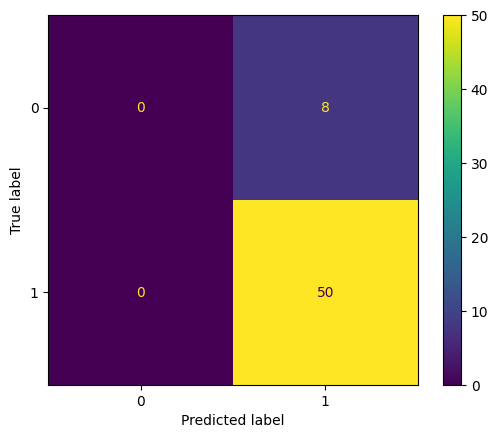

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

In [ ]:
pip install mlxtend

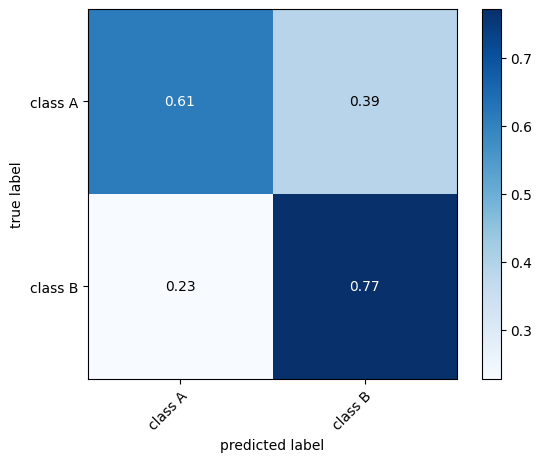

In [79]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Classes
classes = ['class A', 'class B']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

In [90]:
import sklearn

print("Versão do Scikit-Learn:", sklearn.__version__)

Versão do Scikit-Learn: 1.3.2
